In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Función a Optimizar: Eggholder

**Forma General:**
$$
f(x_1,x_2) = -(x_2 + 47) \sin\left(\sqrt{\left| x_2 + \frac{x_1}{2} + 47\right|}\right) - x_1 \sin\left(\sqrt{\left|x_1 - (x_2 + 47)\right|}\right)
$$

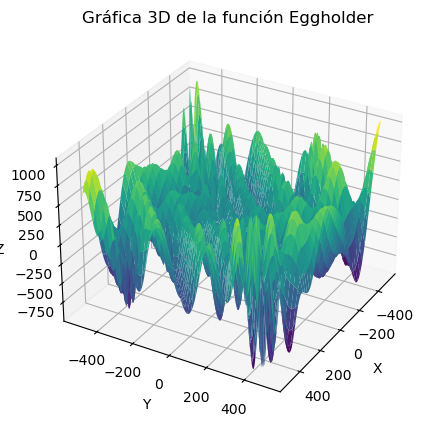

In [4]:
# Función Eggholder
def eggholder(x, y):
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Definición de la grilla
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
# Cálculo de la función Eggholder
Z = eggholder(X, Y)

# Gráfica 3D
def plot_3d(elev=30, azim=30):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Gráfica 3D de la función Eggholder')
    plt.show()

plot_3d()

# Algoritmo de Optimización

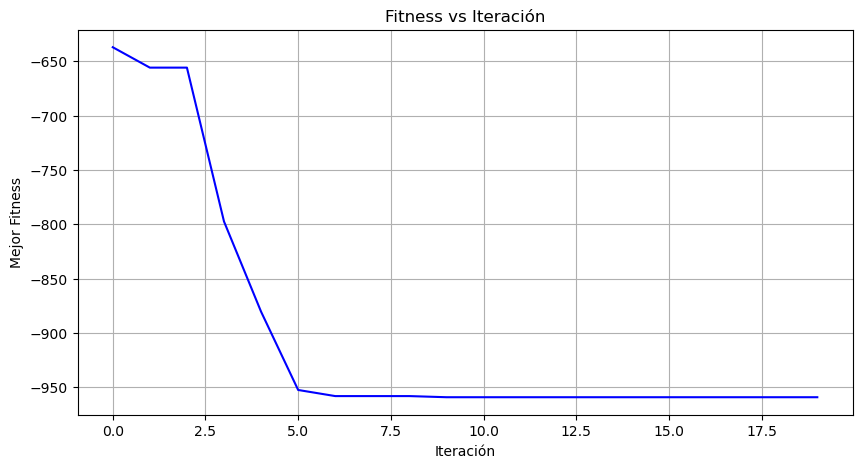

(array([512.        , 404.88555587]), -959.152730705443)

In [12]:
def clonalg(function, bounds, num_particles, num_clones, num_iterations):
    # Inicializar población aleatoriamente dentro de los límites
    population = np.random.rand(num_particles, len(bounds)) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    
    # Función para evaluar la población
    def evaluate_population(population):
        return np.array([function(*individual) for individual in population])
    
    # Historial de la mejor solución
    history = []
    
    # Evolución del algoritmo
    best_solution = None
    best_fitness = np.inf
    
    for _ in range(num_iterations):
        # Evaluar la aptitud de la población
        fitness = evaluate_population(population)
        
        # Selección de los mejores individuos
        best_indices = np.argsort(fitness)
        best_individuals = population[best_indices[:num_clones]]
        best_individual_fitness = fitness[best_indices[0]]
        
        # Actualizar la mejor solución encontrada
        if best_individual_fitness < best_fitness:
            best_fitness = best_individual_fitness
            best_solution = best_individuals[0]
        
        # Registrar el mejor fitness
        history.append(best_fitness)
        
        # Clonación y mutación
        clones = np.repeat(best_individuals, num_particles // num_clones, axis=0)
        mutation_scale = 0.1 * (bounds[:, 1] - bounds[:, 0])
        mutation = np.random.randn(*clones.shape) * mutation_scale
        mutated_clones = np.clip(clones + mutation, bounds[:, 0], bounds[:, 1])  # Asegurarse de que permanezcan dentro de los límites
        
        # Reemplazar la población con clones mutados y algunos nuevos individuos
        population = np.vstack([mutated_clones, np.random.rand(num_particles - len(mutated_clones), len(bounds)) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]])
    
    return best_solution, best_fitness, history

# Definición de límites para las variables x e y
bounds = np.array([[-512, 512], [-512, 512]])

# Ejecutar Clonalg con historial
best_solution, best_fitness, history = clonalg(eggholder, bounds, num_particles=100, num_clones=20, num_iterations=20)

# Gráfica del historial de las mejores soluciones
plt.figure(figsize=(10, 5))
plt.plot(history, linestyle='-', color='b')
plt.title('Fitness vs Iteración')
plt.xlabel('Iteración')
plt.ylabel('Mejor Fitness')
plt.grid(True)
plt.show()

best_solution, best_fitness


# Visualización de la Mejor Solución Encontrada

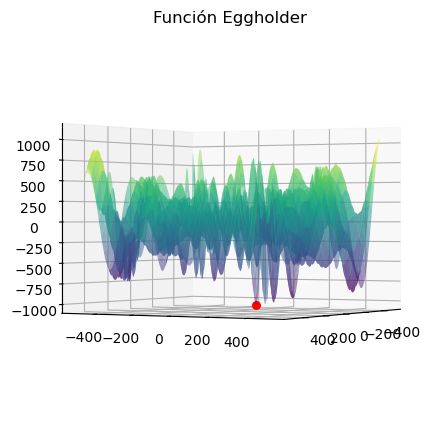

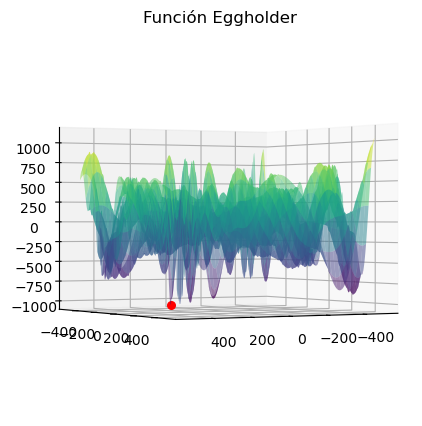

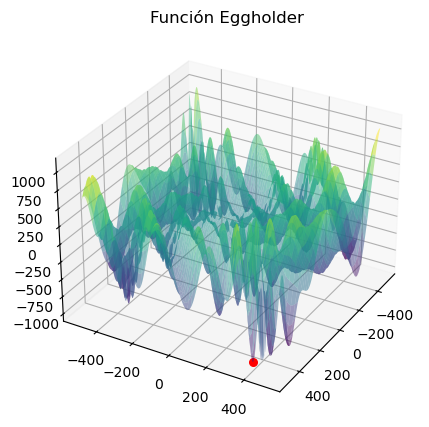

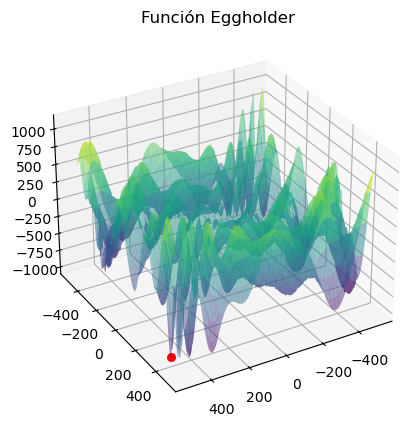

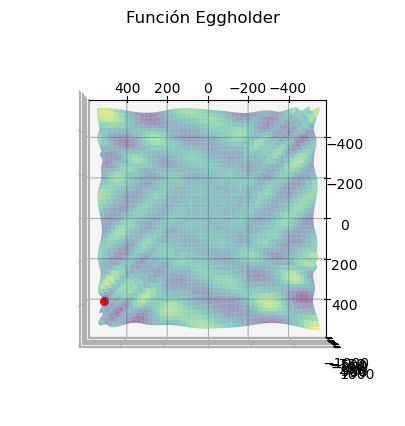

In [14]:
# Función Eggholder
def eggholder(x, y):
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Definición de la grilla
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
# Cálculo de la función Eggholder
Z = eggholder(X, Y)

def plot_3D(elev=0, azim=30):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none').set_alpha(0.5)
    ax.scatter( best_solution[0], best_solution[1], best_fitness, color='r', s=30, label='Mejor solución')
    ax.set_title('Función Eggholder')
    ax.view_init(elev=elev, azim=azim)
    plt.show()

plot_3D()
plot_3D(0, 60)
plot_3D(30, 30)
plot_3D(30, 60)
plot_3D(90, 90)